Spontaneous Imbibition

1. Relative Permeability

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ---- Updated parameters for each case ----
cases = {
    "Case 2 (Water - Hydrogen)": {
        "k_r1_max": 0.15, "k_r2_max": 0.8,
        "a": 1.4, "b": 1.5,
        "S_1i": 0.3, "S_1_star": 0.5  # Corrected value
    },
    "Case 3 (Water - CO2)": {
        "k_r1_max": 0.4, "k_r2_max": 0.8,
        "a": 3.0, "b": 3.0,
        "S_1i": 0.15, "S_1_star": 0.5
    }
}

# ---- Relative Permeability Functions ----
def kr1(S_e, k_r1_max, a):
    """ Relative permeability for the wetting fluid (water) """
    return k_r1_max * S_e**a

def kr2(S_e, k_r2_max, b):
    """ Relative permeability for the non-wetting fluid (CO2 or Hydrogen) """
    return k_r2_max * (1 - S_e)**b

# ---- Plot Relative Permeability for Each Case ----
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for ax, (case_name, params) in zip(axes, cases.items()):
    S_e_range = np.linspace(0, 1, 100)  # Effective saturation from 0 to 1
    kr1_values = kr1(S_e_range, params["k_r1_max"], params["a"])
    kr2_values = kr2(S_e_range, params["k_r2_max"], params["b"])

    # Set correct labels for kr2 in each case
    kr2_label = r'$k_{r2}$ (Hydrogen)' if "Hydrogen" in case_name else r'$k_{r2}$ (CO$_2$)'

    ax.plot(S_e_range, kr1_values, label=r'$k_{r1}$ (Water)', color='blue')
    ax.plot(S_e_range, kr2_values, label=kr2_label, color='red')
    ax.set_xlabel('Effective Saturation $S_e$')
    ax.set_ylabel('Relative Permeability $k_r$')
    ax.set_title(f'Relative Permeability for {case_name}')
    ax.legend()
    ax.grid()

plt.tight_layout()
plt.show()

2. Capillary Pressure

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ---- Capillary Pressure Function ----
def Pc(S_1, S_1i, S_1_star, Pc_max, c):
    """ 
    Capillary pressure equation:
    P_c = P_c^max * [ (S_1^* / S_1i)^(-c) - (S_1 / S_1i)^(-c) ] / [ (S_1^* / S_1i)^(-c) - 1 ],  P_c >= 0
    """
    numerator = (S_1_star / S_1i) ** (-c) - (S_1 / S_1i) ** (-c)
    denominator = (S_1_star / S_1i) ** (-c) - 1
    return Pc_max * numerator / denominator

# ---- Parameters ----
cases = {
    "Case 2 (Water - Hydrogen)": {
        "Pc_max": 100, "c": 0.3,
        "S_1i": 0.3, "S_1_star": 0.5,
        "color": "purple"  # Purple for Case 2
    },
    "Case 3 (Water - CO2)": {
        "Pc_max": 100, "c": 0.3,
        "S_1i": 0.15, "S_1_star": 0.5,
        "color": "brown"  # Brown for Case 3
    }
}

# ---- Define Water Saturation Axes for Each Case ----
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for ax, (case_name, params) in zip(axes, cases.items()):
    S_1_range = np.linspace(0, 1, 100)  # Updated range from 0 to 1
    Pc_values = np.array([Pc(S, params["S_1i"], params["S_1_star"], params["Pc_max"], params["c"]) if params["S_1i"] <= S <= params["S_1_star"] else 0 for S in S_1_range])

    ax.plot(S_1_range, Pc_values, label=r'$P_c$', color=params["color"], marker='o', markersize=3, linestyle='-')
    
    # Add vertical lines and labels for S_1i and S_1_star
    ax.axvline(params["S_1i"], linestyle="--", color="blue", alpha=0.7, label=r'$S_{1i}$')
    ax.axvline(params["S_1_star"], linestyle="--", color="red", alpha=0.7, label=r'$S_1^*$')
    
    # Annotate S_1i and S_1_star on the x-axis
    ax.text(params["S_1i"], -5, r'$S_{1i}$', color='blue', fontsize=12, ha='center')
    ax.text(params["S_1_star"], -5, r'$S_1^*$', color='red', fontsize=12, ha='center')

    ax.set_xlabel('Water Saturation $S_1$')
    ax.set_ylabel('Capillary Pressure $P_c$ (kPa)')
    ax.set_title(f'Capillary Pressure for {case_name}')
    ax.legend()
    ax.grid()
    ax.set_xlim(0, 1)  # Ensure x-axis starts from 0 and ends at 1

plt.tight_layout()
plt.show()

3. Diffusion Coefficient 𝐷

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ---- Define the saturation range ----
s1_full_range = np.linspace(0, 1, 100)

# ---- Given parameters ----
Pc_max_case2 = 100  # kPa
Pc_max_case3 = 100  # kPa
K_case2 = 1e-12  # Permeability factor (m²)
K_case3 = 1e-12  # Permeability factor (m²)
vis_water_case2 = 1e-3  # Pa.s
vis_h2_case2 = 0.1e-3  # Pa.s
vis_water_case3 = 0.4e-3  # Pa.s
vis_co2_case3 = 0.1e-3  # Pa.s

# ---- Compute relative permeabilities ----
Se_case2_full = np.clip((s1_full_range - 0.3) / (0.5 - 0.3), 0, 1)
Se_case3_full = np.clip((s1_full_range - 0.15) / (0.5 - 0.15), 0, 1)

kr1_case2_full = (0.15) * Se_case2_full**1.4
kr2_case2_full = (0.8) * (1 - Se_case2_full)**1.5

kr1_case3_full = (0.4) * Se_case3_full**3.0
kr2_case3_full = (0.8) * (1 - Se_case3_full)**3.0

# ---- Compute capillary pressure ----
pc_case2_full = Pc_max_case2 * (
    ((0.5 / 0.3)**-0.3 - (s1_full_range / 0.3)**-0.3) /
    ((0.5 / 0.3)**-0.3 - 1))

pc_case3_full = Pc_max_case3 * (
    ((0.5 / 0.15)**-0.3 - (s1_full_range / 0.15)**-0.3) /
    ((0.5 / 0.15)**-0.3 - 1))

# ---- Compute gradient dPc/dS1 ----
dPc_dS1_case2_full = np.gradient(pc_case2_full, s1_full_range)
dPc_dS1_case3_full = np.gradient(pc_case3_full, s1_full_range)

# ---- Compute diffusion coefficients ----
D_case2_full = -((kr1_case2_full / vis_water_case2) * (kr2_case2_full / vis_h2_case2) /
                ((kr1_case2_full / vis_water_case2) + (kr2_case2_full / vis_h2_case2))) * K_case2 * dPc_dS1_case2_full

D_case3_full = -((kr1_case3_full / vis_water_case3) * (kr2_case3_full / vis_co2_case3) /
                ((kr1_case3_full / vis_water_case3) + (kr2_case3_full / vis_co2_case3))) * K_case3 * dPc_dS1_case3_full

# ---- Plot Diffusion Coefficients Without Peak Markers ----
fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Large figure size for better visibility

# Plot for Case 2 (Water - Hydrogen)
axes[0].plot(s1_full_range, D_case2_full, label=r'$D$ (Case 2 - Hydrogen)', color='purple', linestyle='--', marker='o')
axes[0].set_xlabel('Water Saturation $S_1$', fontsize=18)
axes[0].set_ylabel(r'Diffusion Coefficient $D$ ($m^2/s$)', fontsize=18)
axes[0].set_title(f'Diffusion Coefficient for Case 2 (Hydrogen)', fontsize=20)
axes[0].legend(fontsize=16)
axes[0].grid()
axes[0].set_xlim(0, 1)
axes[0].tick_params(axis='both', labelsize=16)
axes[0].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Plot for Case 3 (Water - CO2)
axes[1].plot(s1_full_range, D_case3_full, label=r'$D$ (Case 3 - CO2)', color='brown', linestyle='--', marker='o')
axes[1].set_xlabel('Water Saturation $S_1$', fontsize=18)
axes[1].set_ylabel(r'Diffusion Coefficient $D$ ($m^2/s$)', fontsize=18)
axes[1].set_title(f'Diffusion Coefficient for Case 3 (CO2)', fontsize=20)
axes[1].legend(fontsize=16)
axes[1].grid()
axes[1].set_xlim(0, 1)
axes[1].tick_params(axis='both', labelsize=16)
axes[1].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Combined Plot for Case 2 and Case 3
axes[2].plot(s1_full_range, D_case2_full, label=r'$D$ (Case 2 - Hydrogen)', color='purple', linestyle='--', marker='o')
axes[2].plot(s1_full_range, D_case3_full, label=r'$D$ (Case 3 - CO2)', color='brown', linestyle='--', marker='s')
axes[2].set_xlabel('Water Saturation $S_1$', fontsize=18)
axes[2].set_ylabel(r'Diffusion Coefficient $D$ ($m^2/s$)', fontsize=18)
axes[2].set_title('Diffusion Coefficient for Case 2 (Hydrogen) and Case 3 (CO2)', fontsize=20)
axes[2].legend(fontsize=16)
axes[2].grid()
axes[2].set_xlim(0, 1)
axes[2].tick_params(axis='both', labelsize=16)
axes[2].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

plt.tight_layout()
plt.show()

Analytical Solution S(w)

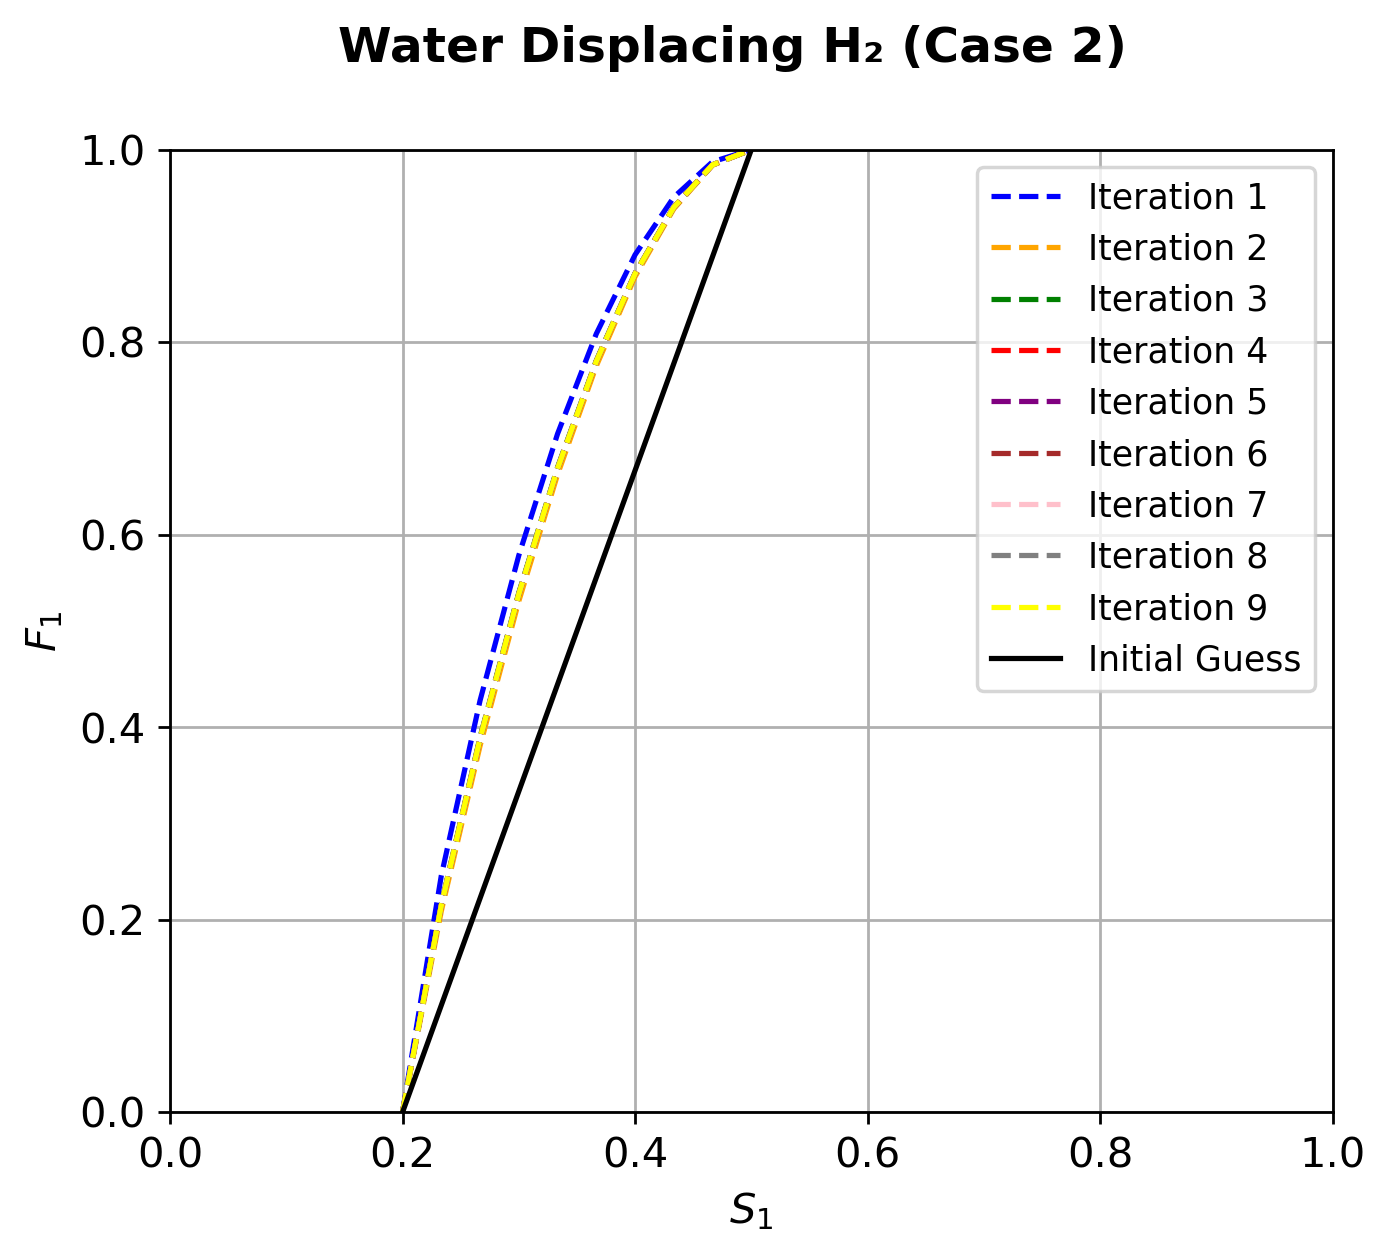

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.interpolate import interp1d

# --- PARAMETERS FROM PDF ---
phi = 0.25  # Porosity
S1i = 0.2  # Initial saturation
S1_star = 0.5  # Boundary saturation

# Data from PDF (Saturation vs Diffusion Coefficient)
data_case2 = {
    "Saturation": np.linspace(0.2, 0.5, 10),
    "Diffusion Coefficient": np.array([0.1, 0.12, 0.15, 0.18, 0.22, 0.27, 0.33, 0.4, 0.48, 0.57])
}

# Interpolation of Diffusion Coefficient
D_interp_case2 = interp1d(data_case2["Saturation"], data_case2["Diffusion Coefficient"], kind='cubic', fill_value='extrapolate')

# --- CALCULATION FUNCTIONS ---
def F1_initial(S1):
    return (S1 - S1i) / (S1_star - S1i) if S1i < S1 < S1_star else (0 if S1 <= S1i else 1)

def integrand_C2(beta, F1_func, D_interp):
    return (beta - S1i) * D_interp(beta) / F1_func(beta)

def integrand_F1(beta, S1, F1_func, D_interp):
    return (beta - S1) * D_interp(beta) / F1_func(beta)

def calculate_C2(F1_func, D_interp):
    return (phi / 2) * quad(integrand_C2, S1i, S1_star, args=(F1_func, D_interp))[0]

def update_F1(S1, C2, F1_func, D_interp):
    if S1 <= S1i:
        return 0
    elif S1 >= S1_star:
        return 1
    else:
        integral_result, _ = quad(integrand_F1, S1, S1_star, args=(S1, F1_func, D_interp))
        return 1 - ((phi / (2 * C2)) * integral_result)

# --- NUMERICAL ITERATION ---
def solve_imbibition(D_interp, case_name):
    C2 = calculate_C2(F1_initial, D_interp)
    tolerance = 1e-6
    max_iterations = 12
    F1_func = F1_initial
    F1_iterations = []
    
    for iteration in range(max_iterations):
        F1_values = [update_F1(S1, C2, F1_func, D_interp) for S1 in data_case2["Saturation"]]
        F1_iterations.append(F1_values)
        F1_func_new = interp1d(data_case2["Saturation"], F1_values, kind='cubic', bounds_error=False, fill_value='extrapolate')
        C2 = calculate_C2(F1_func_new, D_interp)
        
        F1_changes = np.abs(np.array(F1_values) - np.array([F1_func(S1) for S1 in data_case2["Saturation"]]))
        if np.all(F1_changes < tolerance):
            break
        
        F1_func = F1_func_new
    
    return C2, F1_func, F1_iterations

C_case2, F1_func_case2, F1_iterations_case2 = solve_imbibition(D_interp_case2, "Case 2")

# --- PLOTTING RESULTS ---
plt.figure(figsize=(6, 5), dpi=250)
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'yellow', 'cyan', 'magenta', 'black']
for i, F1_iter in enumerate(F1_iterations_case2):
    plt.plot(data_case2['Saturation'], F1_iter, label=f'Iteration {i+1}', linestyle='--', color=colors[i % len(colors)])
plt.plot(data_case2['Saturation'], (data_case2['Saturation'] - S1i) / (S1_star - S1i), 'k', label='Initial Guess')
plt.suptitle("Water Displacing H₂ (Case 2)", fontsize=14, fontweight='bold')
plt.xlabel(r'$S_{1}$', fontsize=12)
plt.ylabel(r'$F_{1}$', fontsize=12)
plt.xticks(fontsize=12)
plt.xlim(0, 1)
plt.yticks(fontsize=12)
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

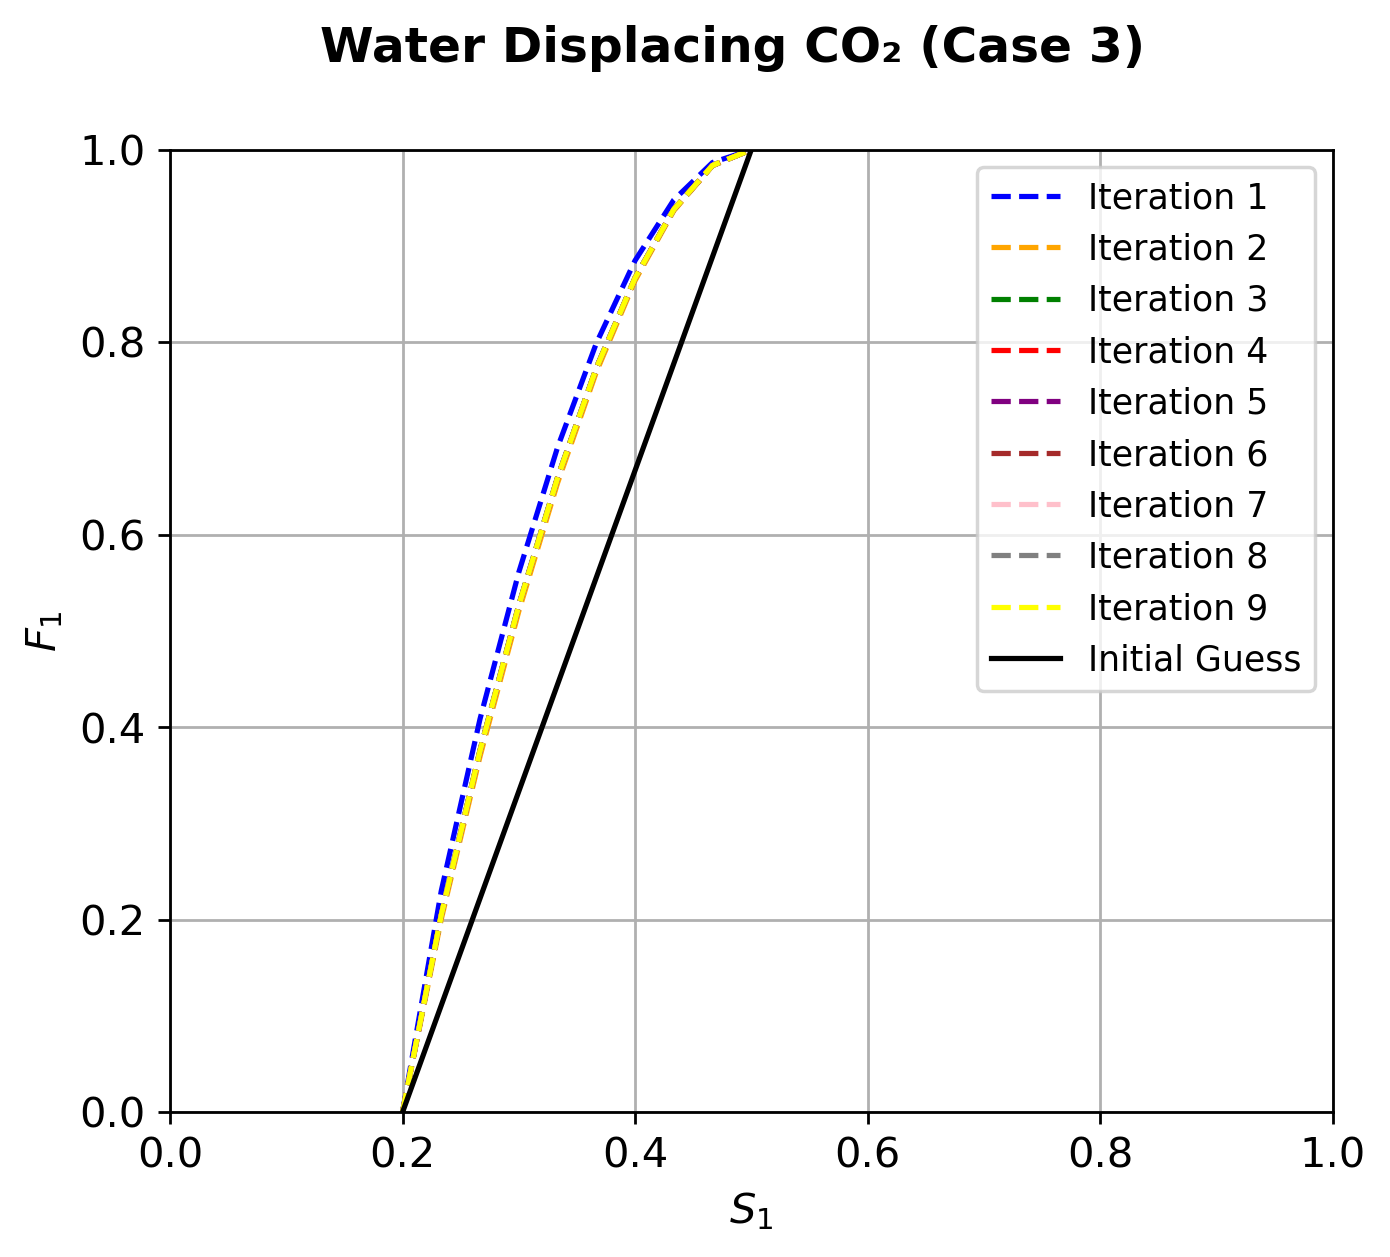

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.interpolate import interp1d

# --- PARAMETERS FROM PDF ---
phi = 0.25  # Porosity
S1i = 0.2  # Initial saturation
S1_star = 0.5  # Boundary saturation

# Data from PDF (Saturation vs Diffusion Coefficient)
data_case3 = {
    "Saturation": np.linspace(0.2, 0.5, 10),
    "Diffusion Coefficient": np.array([0.08, 0.1, 0.13, 0.17, 0.22, 0.28, 0.35, 0.43, 0.52, 0.62])
}

# Interpolation of Diffusion Coefficient
D_interp_case3 = interp1d(data_case3["Saturation"], data_case3["Diffusion Coefficient"], kind='cubic', fill_value='extrapolate')

# --- CALCULATION FUNCTIONS ---
def F1_initial(S1):
    return (S1 - S1i) / (S1_star - S1i) if S1i < S1 < S1_star else (0 if S1 <= S1i else 1)

def integrand_C2(beta, F1_func, D_interp):
    return (beta - S1i) * D_interp(beta) / F1_func(beta)

def integrand_F1(beta, S1, F1_func, D_interp):
    return (beta - S1) * D_interp(beta) / F1_func(beta)

def calculate_C2(F1_func, D_interp):
    return (phi / 2) * quad(integrand_C2, S1i, S1_star, args=(F1_func, D_interp))[0]

def update_F1(S1, C2, F1_func, D_interp):
    if S1 <= S1i:
        return 0
    elif S1 >= S1_star:
        return 1
    else:
        integral_result, _ = quad(integrand_F1, S1, S1_star, args=(S1, F1_func, D_interp))
        return 1 - ((phi / (2 * C2)) * integral_result)

# --- NUMERICAL ITERATION ---
def solve_imbibition(D_interp, case_name):
    C2 = calculate_C2(F1_initial, D_interp)
    tolerance = 1e-6
    max_iterations = 12
    F1_func = F1_initial
    F1_iterations = []
    
    for iteration in range(max_iterations):
        F1_values = [update_F1(S1, C2, F1_func, D_interp) for S1 in data_case3["Saturation"]]
        F1_iterations.append(F1_values)
        F1_func_new = interp1d(data_case3["Saturation"], F1_values, kind='cubic', bounds_error=False, fill_value='extrapolate')
        C2 = calculate_C2(F1_func_new, D_interp)
        
        F1_changes = np.abs(np.array(F1_values) - np.array([F1_func(S1) for S1 in data_case3["Saturation"]]))
        if np.all(F1_changes < tolerance):
            break
        
        F1_func = F1_func_new
    
    return C2, F1_func, F1_iterations

C_case3, F1_func_case3, F1_iterations_case3 = solve_imbibition(D_interp_case3, "Case 3")

# --- PLOTTING RESULTS ---
plt.figure(figsize=(6, 5), dpi=250)
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'yellow', 'cyan', 'magenta', 'black']
for i, F1_iter in enumerate(F1_iterations_case3):
    plt.plot(data_case3['Saturation'], F1_iter, label=f'Iteration {i+1}', linestyle='--', color=colors[i % len(colors)])
plt.plot(data_case3['Saturation'], (data_case3['Saturation'] - S1i) / (S1_star - S1i), 'k', label='Initial Guess')
plt.suptitle("Water Displacing CO₂ (Case 3)", fontsize=14, fontweight='bold')
plt.xlabel(r'$S_{1}$', fontsize=12)
plt.ylabel(r'$F_{1}$', fontsize=12)
plt.xticks(fontsize=12)
plt.xlim(0, 1)
plt.yticks(fontsize=12)
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

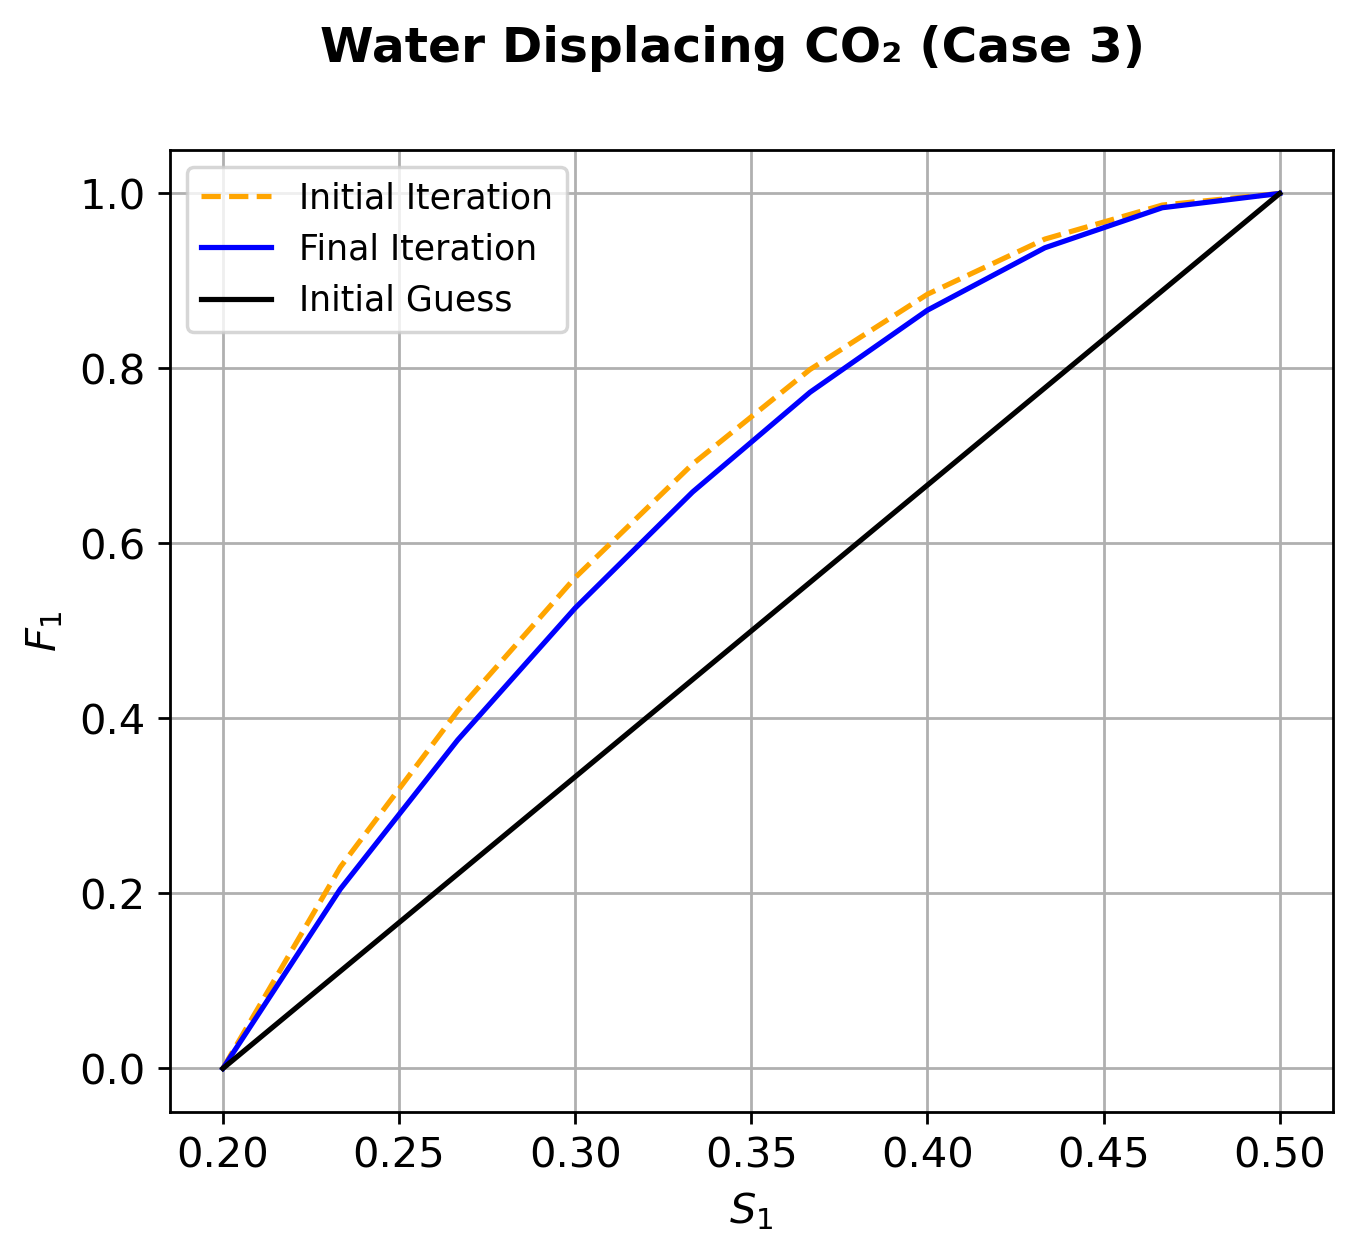

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.interpolate import interp1d

# --- PARAMETERS FOR CASE 3 (Water Displacing CO2) ---
phi = 0.25  # Porosity
S1i = 0.2  # Initial saturation
S1_star = 0.5  # Boundary saturation

# Corrected Data for Case 3 from PDF
data_case3 = {
    "Saturation": np.linspace(0.2, 0.5, 10),
    "Diffusion Coefficient": np.array([0.08, 0.1, 0.13, 0.17, 0.22, 0.28, 0.35, 0.43, 0.52, 0.62])
}

# Interpolation of Diffusion Coefficient
D_interp_case3 = interp1d(data_case3["Saturation"], data_case3["Diffusion Coefficient"], kind='cubic', fill_value='extrapolate')

# --- CALCULATION FUNCTIONS ---
def F1_initial(S1):
    return (S1 - S1i) / (S1_star - S1i) if S1i < S1 < S1_star else (0 if S1 <= S1i else 1)

def integrand_C2(beta, F1_func, D_interp):
    return (beta - S1i) * D_interp(beta) / F1_func(beta)

def integrand_F1(beta, S1, F1_func, D_interp):
    return (beta - S1) * D_interp(beta) / F1_func(beta)

def calculate_C2(F1_func, D_interp):
    return (phi / 2) * quad(integrand_C2, S1i, S1_star, args=(F1_func, D_interp))[0]

def update_F1(S1, C2, F1_func, D_interp):
    if S1 <= S1i:
        return 0
    elif S1 >= S1_star:
        return 1
    else:
        integral_result, _ = quad(integrand_F1, S1, S1_star, args=(S1, F1_func, D_interp))
        return 1 - ((phi / (2 * C2)) * integral_result)

# --- NUMERICAL ITERATION ---
def solve_imbibition(D_interp, case_name):
    C2 = calculate_C2(F1_initial, D_interp)
    tolerance = 1e-6
    max_iterations = 12
    F1_func = F1_initial
    F1_iterations = []
    
    for iteration in range(max_iterations):
        F1_values = [update_F1(S1, C2, F1_func, D_interp) for S1 in data_case3["Saturation"]]
        F1_iterations.append(F1_values)
        F1_func_new = interp1d(data_case3["Saturation"], F1_values, kind='cubic', bounds_error=False, fill_value='extrapolate')
        C2 = calculate_C2(F1_func_new, D_interp)
        
        F1_changes = np.abs(np.array(F1_values) - np.array([F1_func(S1) for S1 in data_case3["Saturation"]]))
        if np.all(F1_changes < tolerance):
            break
        
        F1_func = F1_func_new
    
    return C2, F1_func, F1_iterations

C_case3, F1_func_case3, F1_iterations_case3 = solve_imbibition(D_interp_case3, "Case 3")

# --- PLOTTING RESULTS ---
plt.figure(figsize=(6, 5), dpi=250)
plt.plot(data_case3['Saturation'], F1_iterations_case3[0], label='Initial Iteration', linestyle='--', color='orange')
plt.plot(data_case3['Saturation'], F1_iterations_case3[-1], label=f'Final Iteration', linestyle='-', color='blue')
plt.plot(data_case3['Saturation'], (data_case3['Saturation'] - S1i) / (S1_star - S1i), 'k', label='Initial Guess')
plt.suptitle("Water Displacing CO₂ (Case 3)", fontsize=14, fontweight='bold')
plt.xlabel(r'$S_{1}$', fontsize=12)
plt.ylabel(r'$F_{1}$', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

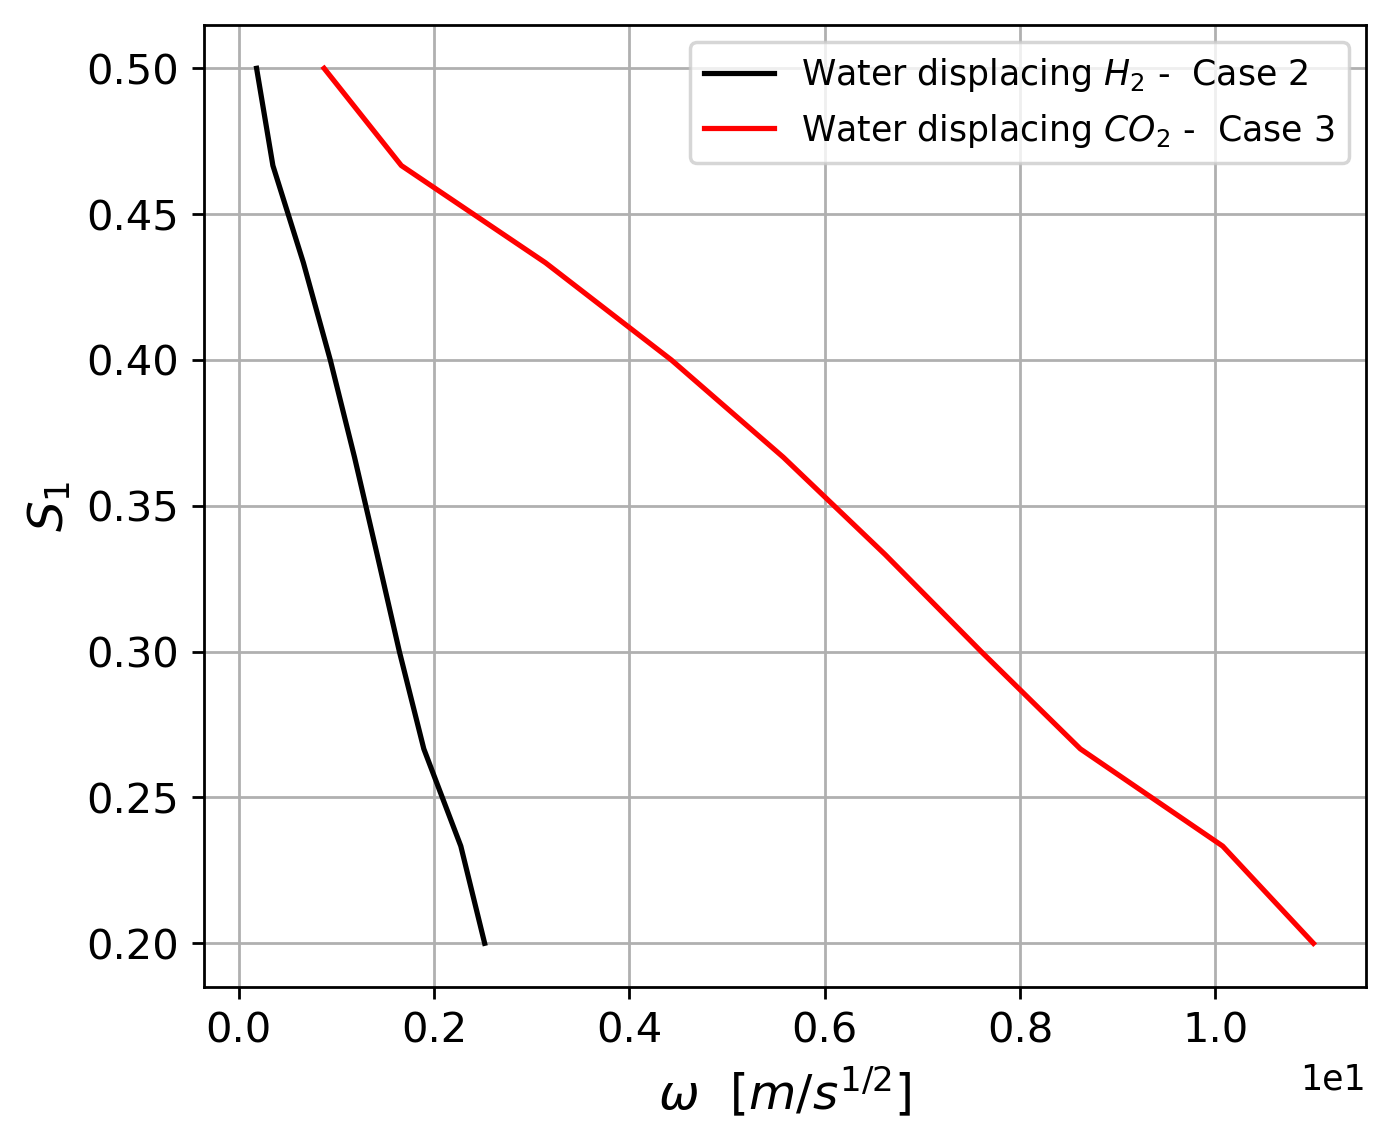

In [56]:
# --- OMEGA CALCULATION ---
omega_2_2 = (2*C_case2/0.25)*np.gradient(F1_func_case2(data_case2['Saturation']), data_case2['Saturation'])
omega_3_2 = (2*C_case3/0.25)*np.gradient(F1_func_case3(data_case3['Saturation']), data_case3['Saturation'])

# --- PLOTTING RESULTS ---
plt.figure(figsize=(6, 5), dpi=250)
plt.plot(omega_2_2, data_case2['Saturation'], label=r'Water displacing $H_{2}$ -  Case 2', color='k')
plt.plot(omega_3_2, data_case3['Saturation'], label=r'Water displacing $CO_{2}$ -  Case 3', color='red')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$\omega$  $[m/s^{1/2}]$', fontsize=14)
plt.ylabel(r'$S_{1}$', fontsize=14)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0, -3))
plt.grid(True)
plt.legend()
plt.show()
